**ML 365 Data Science Challenge** 
365 Data Science is an online learning platform specializing in data science courses. Students learn by watching video content, then evaluate their knowledge by taking quizzes, practice exams, course exams, and career track exams. 

The task is to develop a machine learning model to predict whether a ***Free Plan user would convert to a paid subscriber or not.***

Think of the features that could help determine the outcome. Share your results by supporting them with relevant metrics, a confusion matrix, or another industry-standard method for model evaluation. Note that this classification problem deals with a heavily imbalanced dataset.

## 1. Import the relevant libraries

In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report,precision_recall_fscore_support
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.feature_selection import f_regression
import pickle
import seaborn as sns
from google.colab import files
from google.colab import drive
sns.set()

In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
!cd /content/drive/MyDrive/Colab Notebooks/365_DataScience_ML_Challenge

/bin/bash: line 0: cd: too many arguments


In [4]:
#Load DS from source
read_Std_df=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/365_DataScience_ML_Challenge/FreeStud_Switch_365_DS_Version2.csv")
#shuffle the Data
read_Std_df = read_Std_df.sample(frac = 1)


In [5]:
read_Std_df.date_registered=pd.to_datetime(read_Std_df.date_registered,infer_datetime_format='%Y-%m-%d %H:%M:%S')
# encode country category into numerical value
le = LabelEncoder()
le.fit(read_Std_df['student_country'])
read_Std_df['student_country']=le.transform(read_Std_df['student_country'])
#View first 5 data records
read_Std_df.head(5)

,student_country,date_registered,Number of Courses Taken,Number of engagement_quizzes,Number of engagement_exams,Number of engagement_lessons,Number of date_engaged,Total minutes_watched,Total Number of date_watched,Number_of_Exams_Attempted,Number of Exams_Taken,Average_Exam_Result,Average_Exam_Completion_Time,Switch
266,60,2022-05-05,1,1,0,0,1,0.0,1,0,0,0.0,0.0,0
353,6,2022-06-03,0,0,0,0,1,0.6,1,0,0,0.0,0.0,0
139,15,2022-06-25,1,2,0,2,2,40.9,2,0,0,0.0,0.0,1
311,17,2022-02-01,0,0,0,0,0,6.6,0,0,0,0.0,0.0,0
180,31,2022-09-08,0,0,0,1,1,0.0,0,0,0,0.0,0.0,0


In [6]:
read_Std_df.describe()

,student_country,Number of Courses Taken,Number of engagement_quizzes,Number of engagement_exams,Number of engagement_lessons,Number of date_engaged,Total minutes_watched,Total Number of date_watched,Number_of_Exams_Attempted,Number of Exams_Taken,Average_Exam_Result,Average_Exam_Completion_Time,Switch
count,370.000000,370.000000,370.000000,370.000000,370.000000,370.000000,370.000000,370.000000,370.000000,370.000000,370.000000,370.000000,370.000000
mean,37.072973,0.851351,0.613514,0.154054,1.508108,1.527027,35.650541,1.505405,0.154054,0.154054,8.017324,0.763297,0.467568
std,19.180856,1.256770,1.421603,0.454484,2.668940,2.701114,100.635757,2.669962,0.454484,0.454484,22.864330,2.583055,0.499623
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,23.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,33.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.800000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,60.000000,1.000000,1.000000,0.000000,1.000000,1.000000,16.775000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,63.000000,8.000000,16.000000,3.000000,23.000000,23.000000,1035.600000,23.000000,3.000000,3.000000,100.000000,23.600000,1.000000


In [7]:
#Get dataframe information
read_Std_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 370 entries, 266 to 245
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   student_country               370 non-null    int64         
 1   date_registered               370 non-null    datetime64[ns]
 2   Number of Courses Taken       370 non-null    int64         
 3   Number of engagement_quizzes  370 non-null    int64         
 4   Number of engagement_exams    370 non-null    int64         
 5   Number of engagement_lessons  370 non-null    int64         
 6   Number of date_engaged        370 non-null    int64         
 7   Total minutes_watched         370 non-null    float64       
 8   Total Number of date_watched  370 non-null    int64         
 9   Number_of_Exams_Attempted     370 non-null    int64         
 10  Number of Exams_Taken         370 non-null    int64         
 11  Average_Exam_Result           

In [8]:
#Correlation into a dataframe
std_corr_df=read_Std_df.corr()

In [13]:
#Check for null value
read_Std_df.isna().sum()

student_country                 0
date_registered                 0
Number of Courses Taken         0
Number of engagement_quizzes    0
Number of engagement_exams      0
Number of engagement_lessons    0
Number of date_engaged          0
Total minutes_watched           0
Total Number of date_watched    0
Number_of_Exams_Attempted       0
Number of Exams_Taken           0
Average_Exam_Result             0
Average_Exam_Completion_Time    0
Switch                          0
dtype: int64

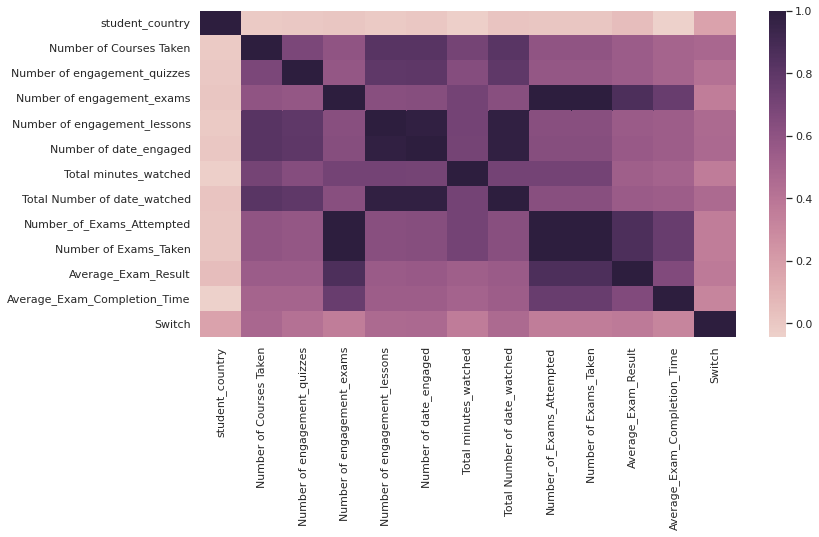

In [12]:
# Heatmap of the attribute Correlation
plt.figure(figsize=(12,6))
sns.heatmap(std_corr_df, cmap=sns.cubehelix_palette(as_cmap=True))

In [14]:
#Check p value of multi linear regression to determine if a variable is redundant or provides less information
#Number of engagement_lessons,Number of date_engaged,Total minutes_watched,Total Number of date_watched-
# have p-value of more than 0.05 decided to remove Number of date_engaged is more or less redundant 
y=np.asarray(read_Std_df['Switch'])
x1=read_Std_df[['student_country','Number of Courses Taken','Number of engagement_quizzes','Number of engagement_exams'
              ,'Number of engagement_lessons','Number of date_engaged','Total minutes_watched','Total Number of date_watched'
              ,'Number_of_Exams_Attempted','Number of Exams_Taken','Average_Exam_Result'
              ,'Average_Exam_Completion_Time']]


In [15]:
#OLS stats model
x = sm.add_constant(x1)
results = sm.OLS(y,x).fit()
results.summary()

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.293
Model:                            OLS   Adj. R-squared:                  0.274
Method:                 Least Squares   F-statistic:                     14.91
Date:                Sat, 07 Jan 2023   Prob (F-statistic):           3.02e-22
Time:                        00:58:25   Log-Likelihood:                -203.52
No. Observations:                 370   AIC:                             429.0
Df Residuals:                     359   BIC:                             472.1
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                            0.1380      0.051      2.698      0.007       0.037       0.238
student_country                  0.0045      0.001      3.811      0.000       0.002       0.007
Number of Courses Taken          0.1086      0.033      3.257      0.001       0.043       0.174
Number of engagement_quizzes     0.0305      0.027      1.130      0.259      -0.023       0.084
Number of engagement_exams      -0.0457      0.046     -0.997      0.319      -0.136       0.044
Number of engagement_lessons     0.0152      0.053      0.289      0.773      -0.088       0.119
Number of date_engaged           0.0153      0.052      0.293      0.770      -0.088       0.118
Total minutes_watched         2.798e-05      0.000      0.069      0.945      -0.001       0.001
Total Number of date_watched    -0.0074      0.053     -0.140      0.889      -0.111       0.096
Number_of_Exams_Attempted       -0.0457      0.046     -0.997      0.319      -0.136       0.044
Number of Exams_Taken           -0.0457      0.046     -0.997      0.319      -0.136       0.044
Average_Exam_Result              0.0036      0.002      1.745      0.082      -0.000       0.008
Average_Exam_Completion_Time     0.0113      0.014      0.825      0.410      -0.016       0.038
==============================================================================
Omnibus:                      738.271   Durbin-Watson:                   1.891
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               33.820
Skew:                           0.319   Prob(JB):                     4.53e-08
Kurtosis:                       1.663   Cond. No.                     5.16e+18
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.64e-31. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [16]:
#Drop the redundant variable with high p-value from the OLS model
read_Std_df=read_Std_df.drop(['Number of date_engaged'],axis=1)

In [17]:
read_Std_df.head()

,student_country,date_registered,Number of Courses Taken,Number of engagement_quizzes,Number of engagement_exams,Number of engagement_lessons,Total minutes_watched,Total Number of date_watched,Number_of_Exams_Attempted,Number of Exams_Taken,Average_Exam_Result,Average_Exam_Completion_Time,Switch
266,60,2022-05-05,1,1,0,0,0.0,1,0,0,0.0,0.0,0
353,6,2022-06-03,0,0,0,0,0.6,1,0,0,0.0,0.0,0
139,15,2022-06-25,1,2,0,2,40.9,2,0,0,0.0,0.0,1
311,17,2022-02-01,0,0,0,0,6.6,0,0,0,0.0,0.0,0
180,31,2022-09-08,0,0,0,1,0.0,0,0,0,0.0,0.0,0


## 2.Preprocessing

In [19]:
train_data,test_data=train_test_split(read_Std_df[['student_country','Number of Courses Taken','Number of engagement_quizzes','Number of engagement_exams'
              ,'Number of engagement_lessons','Total minutes_watched','Total Number of date_watched'
              ,'Number_of_Exams_Attempted','Number of Exams_Taken','Average_Exam_Result'
              ,'Average_Exam_Completion_Time','Switch']],random_state=15,stratify=read_Std_df['Switch'],test_size=0.2)
train_data_,validation_data=train_test_split(train_data,random_state=15,stratify=train_data['Switch'],test_size=0.3)
# Train Data Split
x_train=train_data_.iloc[:,0:10]
y_train=train_data_.iloc[:,-1]
#Validation Data Split
x_val=validation_data.iloc[:,0:10]
y_val=validation_data.iloc[:,-1]
#Test Data Split
x_test=test_data.iloc[:,0:10]
y_test=test_data.iloc[:,-1]

In [20]:
#Sample Balancing on train data
smt=SMOTE(sampling_strategy='all')
x_train,y_train=smt.fit_resample(x_train,y_train)
#Data Preprocessing by using Standard Scaler
scaler=StandardScaler()
scaler.fit(x_train)
scaler.fit(x_val)
scaler.fit(x_test)
x_train=scaler.transform(x_train)
x_val=scaler.transform(x_val)
x_test=scaler.transform(x_test)

## 3. Feature Selection after scaling the variables

In [21]:
f_regression(x_train,y_train)

(array([ 6.37308701, 64.3344162 , 35.77750869, 33.84664132, 53.09992551,
        45.82651947, 55.69697485, 33.84664132, 33.84664132, 35.67799525]),
 array([1.22982890e-02, 6.38886450e-14, 8.96817846e-09, 2.10880726e-08,
        5.74281036e-12, 1.17876450e-10, 1.99456567e-12, 2.10880726e-08,
        2.10880726e-08, 9.37045066e-09]))

In [22]:
p_values = f_regression(x_train,y_train)[1]
p_values

array([1.22982890e-02, 6.38886450e-14, 8.96817846e-09, 2.10880726e-08,
       5.74281036e-12, 1.17876450e-10, 1.99456567e-12, 2.10880726e-08,
       2.10880726e-08, 9.37045066e-09])

In [23]:
#All the variables have below 0.05 p value which shows they are all useful for the predication
p_values.round(3)

array([0.012, 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
       0.   ])

In [24]:
#Check the len split of datasets
len(train_data),len(x_train),len(y_train),len(x_test),len(y_test),len(x_val),len(y_val)

(296, 220, 220, 74, 74, 89, 89)

In [ ]:
# !pip install imbalanced-learn

## 4. Model Selection using Grid Search

In [25]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.model_selection import GridSearchCV

In [26]:
### Pipelines Creation
## Apply  Classifier
pipeline_lr=Pipeline([('lr_classifier',LogisticRegression(random_state=15))])
pipeline_dt=Pipeline([('dt_classifier',DecisionTreeClassifier(random_state=15))])
pipeline_randomforest=Pipeline([('rf_classifier',RandomForestClassifier(random_state=15))])
pipeline_knn=Pipeline([('knn_classifier',KNeighborsClassifier(n_neighbors=4))])
pipeline_etrt=Pipeline([('extr_classifier',ExtraTreesClassifier(random_state=15))])
pipeline_gb=Pipeline([('grb_classifier',GradientBoostingClassifier(random_state=15, subsample=0.8, max_features="auto", warm_start=True))])
pipeline_nb_cv=Pipeline([('nb_cv_classifier',BernoulliNB())])


In [27]:
## the list of pipelines
pipelines = [pipeline_lr, pipeline_dt, pipeline_randomforest,pipeline_knn,pipeline_etrt,pipeline_gb,pipeline_nb_cv]

In [28]:
#List of best model parameter holder
best_accuracy=0.0
best_classifier=0
best_pipeline=""

In [29]:
# Fit the pipelines
for pipe in pipelines:
    pipe.fit(x_train, y_train)

In [31]:
# Dictionary of pipelines and classifier types for ease of reference
pipe_dict = {0: 'Logistic Regression', 1: 'Decision Tree', 2: 'RandomForest',3:'KNeighborsClassifier',4:'ExtraTreesClassifier',5:'GradientBoostingClassifier',6:'BernoulliNB'}


## 5. Metrics of the models

In [32]:
#Get accuracy of models
for i,model in enumerate(pipelines):
    print("\033[1m \033[1;34m  {} Test Accuracy:=====================>> {}".format(pipe_dict[i],round(model.score(x_val,y_val),4)*100))

   Logistic Regression Test Accuracy:=====================>> 85.39
   Decision Tree Test Accuracy:=====================>> 87.64
   RandomForest Test Accuracy:=====================>> 96.63000000000001
   KNeighborsClassifier Test Accuracy:=====================>> 92.13
   ExtraTreesClassifier Test Accuracy:=====================>> 95.50999999999999
   GradientBoostingClassifier Test Accuracy:=====================>> 95.50999999999999
   BernoulliNB Test Accuracy:=====================>> 82.02000000000001


In [33]:
for i,model in enumerate(pipelines):
  print(" \033[0;32m {} \033[1m classification_report:=====================>>".format(pipe_dict[i]))
  print(" \033[0;32m \033[1m {}\033[0;32m \033[1m".format(classification_report(y_val, model.predict(x_val))))
  print(" \033[1m \033[1;34m  {}\033[1m \033[1;34m ".format(precision_recall_fscore_support(y_val, model.predict(x_val), average="weighted")))

  Logistic Regression  classification_report:=====================>>
                 precision    recall  f1-score   support

           0       0.82      0.94      0.87        48
           1       0.91      0.76      0.83        41

    accuracy                           0.85        89
   macro avg       0.86      0.85      0.85        89
weighted avg       0.86      0.85      0.85        89
 
    (0.861293036111278, 0.8539325842696629, 0.8520795607432456, None)  
  Decision Tree  classification_report:=====================>>
                 precision    recall  f1-score   support

           0       0.93      0.83      0.88        48
           1       0.83      0.93      0.87        41

    accuracy                           0.88        89
   macro avg       0.88      0.88      0.88        89
weighted avg       0.88      0.88      0.88        89
 
    (0.8822553708774042, 0.8764044943820225, 0.876560608447474, None)  
  RandomForest  classification_report:=====================>>


## 6.Best performing Model Metrics on Validation split

In [34]:
#RandomForest and  ExtraTreesClassifier have the best performance from the pipline of models.
for i,model in enumerate(pipelines):
    if model.score(x_val,y_val)>best_accuracy:
        best_accuracy=model.score(x_val,y_val)
        best_pipeline=model
        best_classifier=i
print(' \033[1;31m Classifier with best accuracy:=================>>>>>>>>{} \033[1;31m'.format(pipe_dict[best_classifier]))
predicated_value=best_pipeline.predict(x_val)
print(classification_report(y_val,predicated_value))

  Classifier with best accuracy:=================>>>>>>>>RandomForest 
              precision    recall  f1-score   support

           0       1.00      0.94      0.97        48
           1       0.93      1.00      0.96        41

    accuracy                           0.97        89
   macro avg       0.97      0.97      0.97        89
weighted avg       0.97      0.97      0.97        89



## 7.Testing The Model Metrics on Test DS

In [35]:
for i,model in enumerate(pipelines):
    if model.score(x_val,y_val)>best_accuracy:
        best_accuracy=model.score(x_val,y_val)
        best_pipeline=model
        best_classifier=i
print(' \033[1;31m Classifier with best accuracy:=================>>>>>>>>{} \033[1;31m'.format(pipe_dict[best_classifier]))
predicated_value=best_pipeline.predict(x_test)
print(classification_report(y_test,predicated_value))

  Classifier with best accuracy:=================>>>>>>>>RandomForest 
              precision    recall  f1-score   support

           0       1.00      0.97      0.99        39
           1       0.97      1.00      0.99        35

    accuracy                           0.99        74
   macro avg       0.99      0.99      0.99        74
weighted avg       0.99      0.99      0.99        74



In [39]:
#Save Model the best working model
# with open('/content/drive/MyDrive/Colab Notebooks/365_DataScience_ML_Challenge/RandomForest.pickle', 'wb') as f:
#   pickle.dump(RandomForest.pickle, f)

pickle.dump(model, open('best_pipeline.pkl', 'wb'))